In this project, I want to answer some business questions based on AIRBNB data provided through Kaggle. I will start with importing some libraries(the usual suspects)


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import numpy as np
from collections import defaultdict

%matplotlib inline

In [41]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)

In [42]:
calendar = pd.read_csv('./calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [43]:
listings = pd.read_csv('./listings.csv')
listings.head(50)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

As can be seen there is some data repetition. Data contains some information such as 'listing-url' that will have no effect on the type of analysis that we are aiming to do. Also some of the information such as 'transit' or 'notes' is non-standard and will require further data processing which I am planning to avoid for this study.

Going through all the keys, I created a rough data cleaning the extra/unnecessary data. 

In [44]:
listings_simplified = listings[['id','experiences_offered','host_id','host_response_time','host_response_rate',
                               'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
                              'host_has_profile_pic','host_identity_verified',
                              'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode',
                              'is_location_exact', 'property_type','room_type','accommodates','bathrooms',
                              'bedrooms','beds','bed_type','square_feet','price',
                              'weekly_price','monthly_price','security_deposit','cleaning_fee',
                               'guests_included', 'extra_people', 'minimum_nights',
                               'maximum_nights', 'calendar_updated', 'has_availability',
                               'availability_30', 'availability_60', 'availability_90',
                               'availability_365', 'calendar_last_scraped', 'number_of_reviews',
                               'first_review', 'last_review', 'review_scores_rating',
                               'review_scores_accuracy', 'review_scores_cleanliness',
                               'review_scores_checkin', 'review_scores_communication',
                               'review_scores_location', 'review_scores_value', 'requires_license',
                               'license', 'jurisdiction_names', 'instant_bookable',
                               'cancellation_policy', 'require_guest_profile_picture',
                               'require_guest_phone_verification', 'calculated_host_listings_count',
                               'reviews_per_month','amenities']]

In [45]:
reviews = pd.read_csv('./reviews.csv')
#reviews.head()

First question that comes to my mind is, whether if it is possible to estimate the rental price/night based on simple things that comes to my mind such as Location, Property Type, Room Type, Max Accomodation.

As a good starting point, I would like to modify and transfer the cleaning function that was covered in the course.

In [168]:
def clean_data(df):
    df = df.dropna(subset=['price'],axis=0)
    #df =  df.loc[df['accommodates']<=4]
    #print(df)
    
    y = df['price'].replace('[\$,]','',regex=True).astype(float)

    X = df.drop(['price'],axis=1)
    X['neighbourhood_group_cleansed'] = X['neighbourhood_group_cleansed'].astype(str)

    
    num_vars = X.select_dtypes(include=['float', 'int']).columns
    
    for col in num_vars:
        X[col].fillna(0,inplace=True)#(df[col].mean()), inplace=True)
        
    cat_vars = X.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_')], axis=1)
    
    return X, y


In [169]:
listings_interest=listings_simplified[['neighbourhood_group_cleansed','property_type','room_type','accommodates',
                                       'bedrooms','price', 
                                       'bathrooms', 'minimum_nights','is_location_exact']]
                                       #,'review_scores_rating','square_feet','host_acceptance_rate',
                                       #'host_identity_verified','is_location_exact','number_of_reviews','host_is_superhost',
                                       #'reviews_per_month','review_scores_cleanliness'

X, y = clean_data(listings_interest) 

In [170]:
def fit_linear_mod(X, y, test_size=.3, rand_state=32):

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test,y_test_preds,y_train_preds

In [171]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(X,y)

In [172]:
test_score, train_score

(0.5389545335550017, 0.5823558071123887)

Now that we have seen that our model performs really bad, it is time to see how other features/keys effect our model performance.

I will start with including 'review_scores_rating'.

In [173]:
def amenity_parser(df, col1, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    
    #loop through list of ed types
    for val in look_for:
        temp_list=[]
        column_name = "amenity_"+val
        new_df[column_name]=0
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                temp_list.append(1)
            else:
                temp_list.append(0)
        new_df[column_name]=temp_list
    return new_df

In [174]:
study = listings['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)
#study[get_loc(]study['amenities'].map(len)==max(study['amenities'].map(len))]
max_list_condition=study['amenities'].map(len)==max(study['amenities'].map(len))
max_index=max_list_condition.index[max_list_condition==True].tolist()

In [175]:
possible_vals=study.iloc[max_index[0]]['amenities'].replace('{','').replace('}','').replace('"','').split(',')
study_df = amenity_parser(listings_simplified, 'amenities', possible_vals)
new_df = pd.DataFrame.from_dict(study_df)

In [176]:
listings_interest = pd.concat([listings_interest, new_df], axis=1)#.drop(['amenities'],axis=1)
X, y = clean_data(listings_interest) 

In [177]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds, y_train_preds = fit_linear_mod(X,y)


In [178]:
test_score, train_score

(0.5399867974932988, 0.596065798273562)

In [167]:
pd.concat([pd.DataFrame(y_test_preds),y_test.reset_index(drop=True)],axis=1)

,0,price
0,70.351562,65.0
1,107.953125,105.0
2,190.328125,189.0
3,318.226562,475.0
4,83.789062,88.0
5,128.804688,199.0
6,191.460938,100.0
7,133.820312,120.0
8,119.828125,99.0
9,184.453125,249.0


In [65]:
yeni= pd.concat([y_test.reset_index(),pd.Series(y_test_preds)],axis=1)

In [67]:
fiyatlar = listings['price'].replace('[\$,]','',regex=True).astype(float)

In [86]:
zipler= pd.to_numeric(listings['accommodates'],errors='coerce')

In [104]:
rating=listings['review_scores_value']

In [105]:
yeni= pd.concat([fiyatlar,rating],axis=1)
#yeni.dropna()

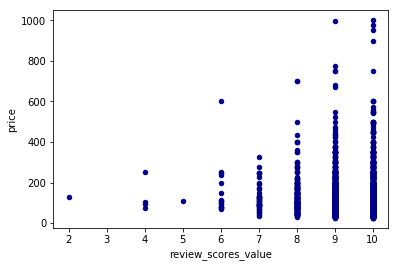

In [106]:
yeni.plot.scatter(x='review_scores_value',y='price',c='DarkBlue')

In [14]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df